Load MNIST data ........ Done.
100.00% epoch: 1 loss: 0.09223 acc: 0.973 loss(test): 0.11547 acc(test): 0.967
100.00% epoch: 2 loss: 0.06543 acc: 0.980 loss(test): 0.08963 acc(test): 0.975
100.00% epoch: 3 loss: 0.04887 acc: 0.985 loss(test): 0.08032 acc(test): 0.977
100.00% epoch: 4 loss: 0.03810 acc: 0.989 loss(test): 0.07123 acc(test): 0.980
100.00% epoch: 5 loss: 0.03408 acc: 0.989 loss(test): 0.07166 acc(test): 0.979


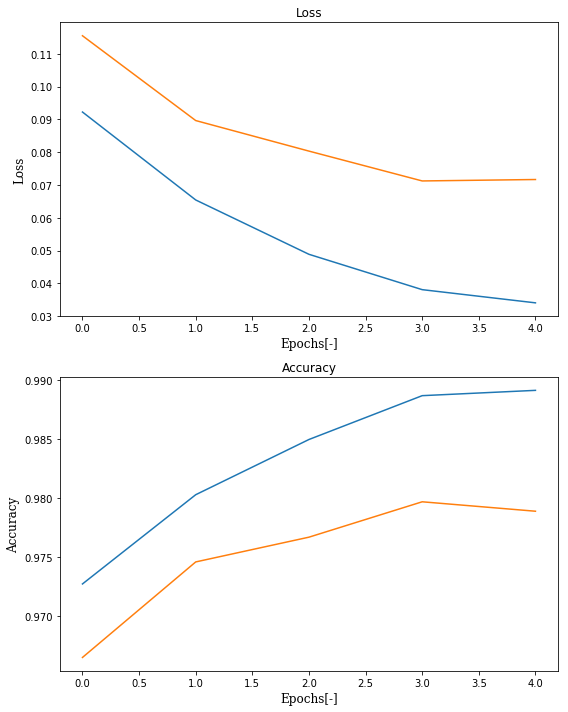

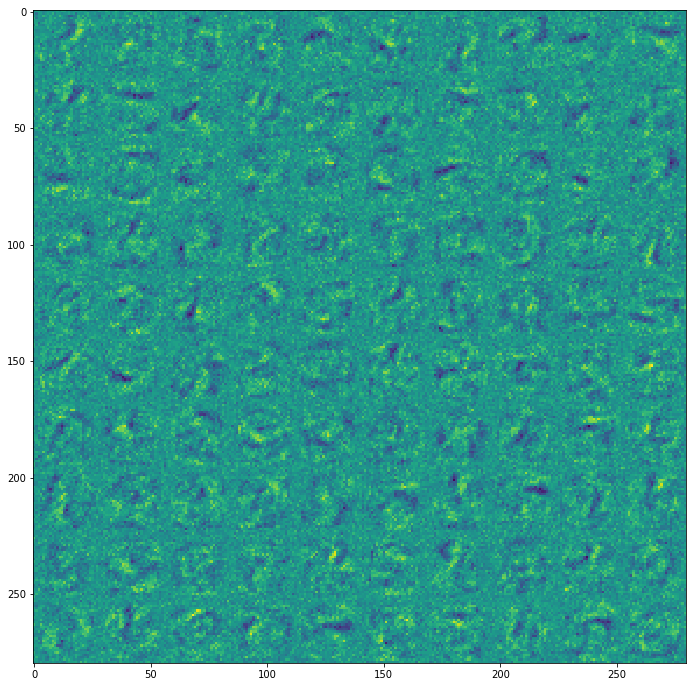

In [1]:
# Authors: Daichi Yoshikawa <daichi.yoshikawa@gmail.com>
# License: BSD 3 clause

from __future__ import absolute_import

import sys
sys.path.append('../../')

import pickle
import numpy as np
import dnn
from dnn.neuralnet import NeuralNetwork
from dnn.utils.nn_utils import scale_normalization

from dnn.training.optimizer import AdaGrad, AdaDelta, RMSProp
from dnn.training.random_weight import RandomWeight
from dnn.training.loss_function import LossFunction

from dnn.layers.affine import AffineLayer
from dnn.layers.activation import Activation, ActivationLayer
from dnn.layers.dropout import DropoutLayer
from dnn.layers.batch_norm import BatchNormLayer

def get_mnist():
    sys.stdout.write('Load MNIST data .')
    x = np.load('input1.npy')
    sys.stdout.write('.')
    x = np.r_[x, np.load('input2.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input3.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input4.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input5.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input6.npy')]
    sys.stdout.write('.')
    x = np.r_[x, np.load('input7.npy')]
    x = x.astype(float)

    sys.stdout.write('.')
    y = np.load('output.npy')
    y = y.astype(float)

    sys.stdout.write(' Done.\n')

    return x, y

dtype = np.float32
model = NeuralNetwork(input_shape=(784), dtype=dtype)
model.add(DropoutLayer(drop_ratio=0.2))
model.add(AffineLayer(shape=(784, 800), random_weight=RandomWeight.Type.he))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.srrelu))
model.add(DropoutLayer(drop_ratio=0.5))
model.add(AffineLayer(shape=(800, 10), random_weight=RandomWeight.Type.default))
model.add(BatchNormLayer())
model.add(ActivationLayer(activation=Activation.Type.softmax))
model.compile()

x, y = get_mnist()
scale_normalization(x)

optimizer = AdaGrad(learning_rate=5e-2, weight_decay=1e-3, dtype=dtype)

lc = model.fit(
        x=x,
        y=y,
        epochs=5,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.multinomial_cross_entropy,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.142857 # Use 60,000 for training and 10,000 for test.
)

lc.plot(figsize=(8,10), fontsize=12)
model.show_filters(0, shape=(28, 28), layout=(10, 10), figsize=(12, 12))

100.00% epoch: 1 loss: 10.43014 acc: 0.013 loss(test): 10.44719 acc(test): 0.013
100.00% epoch: 2 loss: 9.82041 acc: 0.015 loss(test): 9.85054 acc(test): 0.016
100.00% epoch: 3 loss: 9.71357 acc: 0.013 loss(test): 9.74169 acc(test): 0.014
100.00% epoch: 4 loss: 9.57386 acc: 0.015 loss(test): 9.60456 acc(test): 0.017
100.00% epoch: 5 loss: 9.54754 acc: 0.013 loss(test): 9.58022 acc(test): 0.014


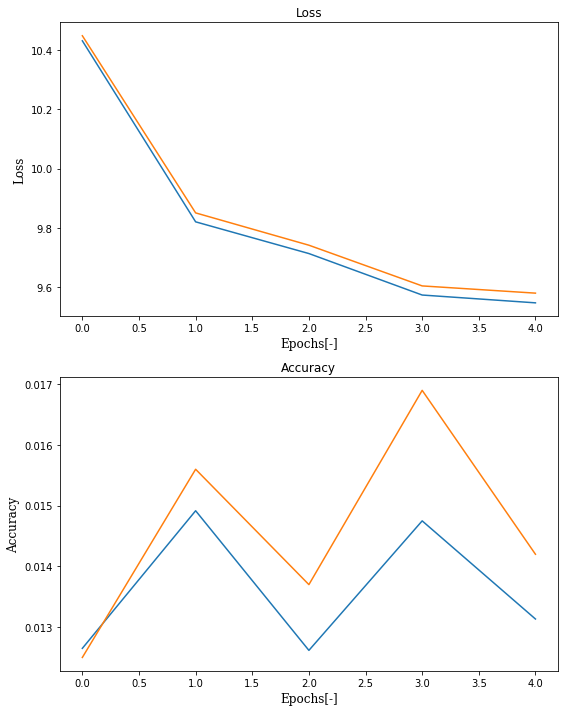

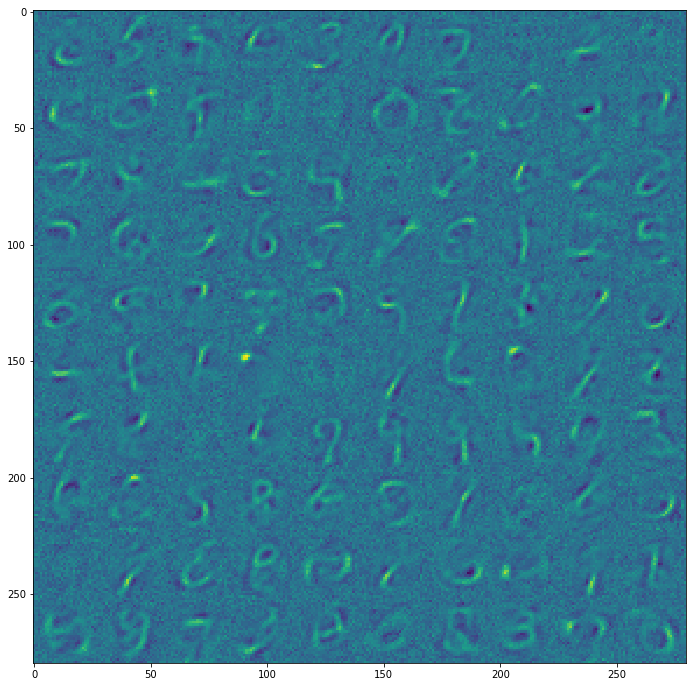

In [5]:
# Auto Encoder
ae = NeuralNetwork(input_shape=(784), dtype=dtype)
ae.add(DropoutLayer(drop_ratio=0.2))
ae.add(AffineLayer(shape=(784, 100), random_weight=RandomWeight.Type.he))
ae.add(BatchNormLayer())
ae.add(ActivationLayer(activation=Activation.Type.srrelu))
ae.add(DropoutLayer(drop_ratio=0.5))
ae.add(AffineLayer(shape=(100, 784), random_weight=RandomWeight.Type.default))
#ae.add(BatchNormLayer())
#ae.add(ActivationLayer(activation=Activation.Type.srrelu))
ae.compile()

lc = ae.fit(
        x=x,
        y=x,
        epochs=5,
        batch_size=100,
        optimizer=optimizer,
        loss_function=LossFunction.Type.squared_error,
        learning_curve=True,
        shuffle=True,
        shuffle_per_epoch=True,
        test_data_ratio=0.142857
)

lc.plot(figsize=(8,10), fontsize=12)
ae.show_filters(0, shape=(28, 28), layout=(10, 10), figsize=(12, 12))